<h1>Chapter 4 | Data Exercise #2 | <code>wms-management-survey</code> | Comparison and correlation</h1>
<h2>Introduction:</h2>
<p>In this notebook, you will find my notes and code for Chapter 5's <b>exercise 2</b> of the book <a href="https://gabors-data-analysis.com/">Data Analysis for Business, Economics, and Policy</a>, by Gábor Békés and Gábor Kézdi. The question was: 
<p>2. Using the <code>wms-management-survey</code> dataset:</p>
<p>Assignments:</p>
<ul>
    <li>Pick a country different from Mexico.</li>
    <li>Reproduce all figures and tables of our case study.</li>
    <li>Compare your results to what we found for Mexico.</li>
</ul>
<h2><b>1.</b> Load the data</h2>

In [1]:
import os
import sys
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from plotnine import *
from mizani.formatters import percent_format

warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# Increase number of returned rows in pandas
pd.set_option("display.max_rows", 500)

In [3]:
# Current script folder
current_path = os.getcwd()
dirname = current_path.split("da_data_exercises")[0]

# Get location folders
data_in = f"{dirname}da_data_repo/wms-management-survey/clean/"
data_out = f"{dirname}da_data_exercises/ch04-comparison_correlation/02-wms_management_ex1/data/clean/"
output = f"{dirname}da_data_exercises/ch04-comparison_correlation/02-wms_management_ex1/"
func = f"{dirname}da_case_studies/ch00-tech_prep/"
sys.path.append(func)

In [4]:
from py_helper_functions import *

In [5]:
df = pd.read_csv(f"{data_in}wms_da_textbook.csv")

In [6]:
df["country"].unique()

array(['United States', 'India', 'New Zealand', 'Australia', 'Argentina',
       'Brazil', 'Canada', 'Chile', 'China', 'Germany', 'Spain', 'France',
       'Northern Ireland', 'Great Britain', 'Greece',
       'Republic of Ireland', 'Italy', 'Japan', 'Mexico', 'Poland',
       'Portugal', 'Sweden', 'Singapore', 'Turkey'], dtype=object)

In [7]:
df.head()

,firmid,wave,cty,country,sic,management,operations,monitor,target,people,...,aa_196,aa_197,aa_198,aa_199,aa_200,aa_201,aa_202,aa_203,aa_204,aa_205
0,1,2004,us,United States,38.0,3.500000,3.0,3.6,3.6,3.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2006,us,United States,38.0,3.166667,5.0,3.8,2.6,2.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,2010,us,United States,38.0,3.000000,2.0,2.8,3.6,3.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,2004,us,United States,28.0,4.666667,4.5,4.8,4.4,4.833333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,2004,us,United States,28.0,4.444445,4.5,4.6,4.4,4.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<h3>1.1 Sample selection</h3>
<p>Let's pick a country with different proportions than Mexico yet let's apply the same exclusions made by the author, that is, filtering out firms with fewer than 100 employees and more than 5000 employees. We'll use the same year, 2013 - we'll choose <b>Brazil</b>.</p>

In [8]:
df = df.loc[
    lambda x: (x["country"] == "Brazil") &
              (x["wave"] == 2013) &
              (x["emp_firm"] >= 100) &
              (x["emp_firm"] <= 5000)
]

In [9]:
df["emp_firm"].describe()

count     506.000000
mean      682.561265
std       936.190571
min       100.000000
25%       181.000000
50%       343.500000
75%       717.250000
max      5000.000000
Name: emp_firm, dtype: float64

<h2>2. Visualizing the distribution of management score</h2>

In [10]:
df.loc[:, ["management"]].describe()

,management
count,506.000000
mean,2.734848
std,0.588271
min,1.055556
25%,2.333333
50%,2.777778
75%,3.111111
max,4.500000


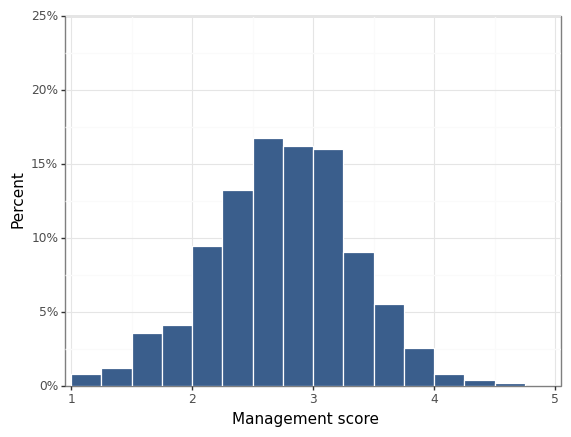

<ggplot: (83530037846)>

In [11]:
ggplot(df, aes(x="management")) + geom_histogram(
    aes(y="stat(count)/sum(stat(count))"),
    fill=color[0],
    color="white",
    binwidth=0.25,
    boundary=0,
    closed="left",
) + labs(x="Management score", y="Percent") + scale_x_continuous(
    expand=(0.01, 0.01), limits=(1, 5)
) + scale_y_continuous(
    expand=(0.00, 0.00),
    limits=(0, 0.25),
    breaks=seq(0, 0.26, by=0.05),
    labels=percent_format()
) + theme_bw()

Some observations about the histogram:
<ul>
<li>The mean is <b>2.73</b>, while the median is <b>2.77</b>. The dataset resembles a normal distribution, with a small degree of skewness to the left.</li>
<li>The standard deviation is <b>0.58</b>.</li>
<li>The mode is in the bin between <b>2.5</b> and <b>2.75</b>.
</ul>
<h2>3. Visualizing the distribution of employment</h2>
<p>We can start by looking at the summary statistics of Brazilian firms by their respective size, which is measured by the number of employees employed by each firm.</li>

In [12]:
df.loc[:, ["emp_firm"]].describe()

,emp_firm
count,506.000000
mean,682.561265
std,936.190571
min,100.000000
25%,181.000000
50%,343.500000
75%,717.250000
max,5000.000000


<p>Observations:</p>
<ul>
<li>The mean is <b>682</b> and the median, <b>343</b>.</li>
<li>The mean is far higher than the median and therefore we can expect a significant degree of <b>skewness</b> to the right.</li>
<li>The standard deviation is <b>936</b>.
</ul>

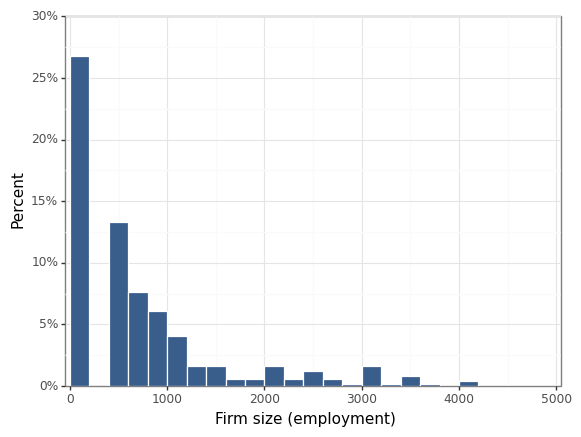

<ggplot: (83530037648)>

In [13]:
ggplot(df, aes(x="emp_firm", y="stat(count)/sum(stat(count))")) + geom_histogram(
    fill=color[0], color="white", binwidth=200, boundary=0, closed="left"
) + labs(x="Firm size (employment)", y="Percent") + scale_x_continuous(
    expand=(0.01, 0.01), limits=(0, 5000), breaks=seq(0, 5001, by=1000)
) + scale_y_continuous(
    expand=(0.00, 0.00),
    limits=(0, 0.3),
    breaks=seq(0, 0.5, by=0.05),
    labels=percent_format(),
) + theme_bw()

The histogram shows a high concentration of smaller firms in Brazil. More specifically, more than 25% of all observations registered firms with less than 200 employees. Interestingly enough, there were no observations in the 200-400 bin.

To make this distribution more symmetric, we can plot a histogram formatted by the lognormal distribution.

In [14]:
df["lnemp_firm"] = np.log(df["emp_firm"])
df["lnemp_firm"].describe()

count    506.000000
mean       5.974693
std        0.965696
min        4.605170
25%        5.198452
50%        5.839186
75%        6.575327
max        8.517193
Name: lnemp_firm, dtype: float64

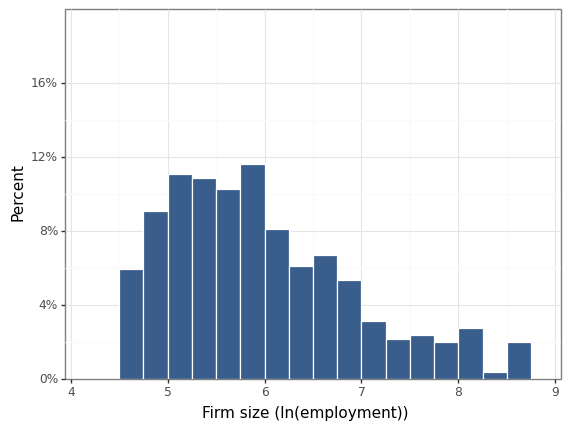

<ggplot: (83532308802)>

In [15]:
ggplot(df, aes(x="lnemp_firm"))  + geom_histogram(
    aes(y="stat(count)/sum(stat(count))"),
    fill=color[0], 
    color="white", 
    binwidth=0.25, 
    boundary=0, 
    closed="left"
) + labs(x="Firm size (ln(employment))", y="Percent") + scale_x_continuous(
    expand=(0.01, 0.01), limits=(4, 9) 
) + scale_y_continuous(
    expand=(0.00, 0.00),
    limits=(0, 0.2),
    breaks=seq(0, 0.2, by=0.04),
    labels=percent_format(),
) + theme_bw()

<p>We notice that the distribution is not as skewed as before, yet it still presents a longer tail to the right. The distribution, nonetheless, is much more symmetrical. In conclusion, the distribution of employment is skewed; while closer to lognormal than normal, the latter is still not the best approach.</p>
<h2>4. Conditional probabilities | Binning firm size and visualize the quality of specific management practices accordingly</h2>
<p>As a reminder, <b>conditional probability</b> of an event means the probability of an event if another event (the conditioning event) happens. Because both the management score and employment are quantitative variables with many values, they are not adequate for an investigation conditional probabilities.</p>
<p>To overcome this issue, we will create a <b>qualitative</b> variable by creating three bins of employment: <b>small, medium, and large</b>. Let's follow the book's example and bind the bins by three intervals: 100-199, 200-999, and 1000+.


In [16]:
df["emp3bins"] = np.where(df["emp_firm"] < 200, 1, np.nan)
df["emp3bins"] = np.where((df["emp_firm"] >= 200) & (df["emp_firm"] < 1000), 2, df["emp3bins"])
df["emp3bins"] = np.where(df["emp_firm"] >= 1000, 3, df["emp3bins"])

In [17]:
df.head()

,firmid,wave,cty,country,sic,management,operations,monitor,target,people,...,aa_198,aa_199,aa_200,aa_201,aa_202,aa_203,aa_204,aa_205,lnemp_firm,emp3bins
1760,1290,2013,br,Brazil,28.0,3.277778,3.0,3.8,3.0,3.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.877296,2.0
1763,1292,2013,br,Brazil,33.0,2.555556,2.5,3.2,2.8,1.833333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.620073,2.0
1765,1293,2013,br,Brazil,33.0,2.666667,3.0,2.8,2.6,2.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.040255,2.0
1766,1294,2013,br,Brazil,35.0,3.222222,4.0,3.8,2.8,2.833333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.313220,3.0
1770,1297,2013,br,Brazil,31.0,3.222222,3.0,3.4,3.0,3.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.605170,1.0


In [18]:
df["emp3bins"].describe()

count    506.000000
mean       1.913043
std        0.657288
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        3.000000
Name: emp3bins, dtype: float64

<p>By now, we can make a few comparisons with the book case study, which used Mexico as an example. We can tell that Brazil and Mexico display similar statistics regarding firm sizes.</p>
<ul>
<li>The mean for Brazil, <b>1.91</b> is close to that of Mexico, <b>2</b>. We can expect that the average firm in both countries is medium-sized.</li>
<li>The standard deviation is equally similar: <b>0.65</b> for Brazil, <b>0.63</b> for Mexico.</li>
</ul>
<h3>4.1 Plotting stacked charts - Describing patterns of association</h3>
<p>We will use stacked charts to visualize conditional probabilities. Because we have 15 conditional probabilities for each management score (that is, the probability of each of the 5 values of y by each of the three values of x), a stacked bar chart will be of great assistance. Let's create the DataFrames for our job.</p>
<h4>4.1.1 Stacked bar chart | Figure 4.3 (a) Lean management</h4>

In [19]:
df1 = pd.DataFrame(
    df.loc[:, ["emp3bins", "lean1"]].groupby(["emp3bins", "lean1"]).agg("size")
).reset_index()

df1.columns = ["emp3bins", "lean1", "Count"]

group_counts = df1.groupby("emp3bins").agg("sum")["Count"]

df1.loc[df1["emp3bins"] == 1, "Percent"] = round(df1.loc[df1["emp3bins"] == 1, "Count"]/group_counts[1],5)
df1.loc[df1["emp3bins"] == 2, "Percent"] = round(df1.loc[df1["emp3bins"] == 2, "Count"]/group_counts[2],5)
df1.loc[df1["emp3bins"] == 3, "Percent"] = round(df1.loc[df1["emp3bins"] == 3, "Count"]/group_counts[3],5)

df1 = df1.assign(
    lean1=pd.Categorical(
        df1["lean1"], categories=sorted(set(df["lean1"]), reverse=True)
    )
)

In [20]:
df1

,emp3bins,lean1,Count,Percent
0,1.0,1.0,27,0.20301
1,1.0,2.0,59,0.44361
2,1.0,3.0,37,0.27820
3,1.0,4.0,9,0.06767
4,1.0,5.0,1,0.00752
5,2.0,1.0,29,0.10211
6,2.0,2.0,108,0.38028
7,2.0,3.0,103,0.36268
8,2.0,4.0,34,0.11972
9,2.0,5.0,10,0.03521


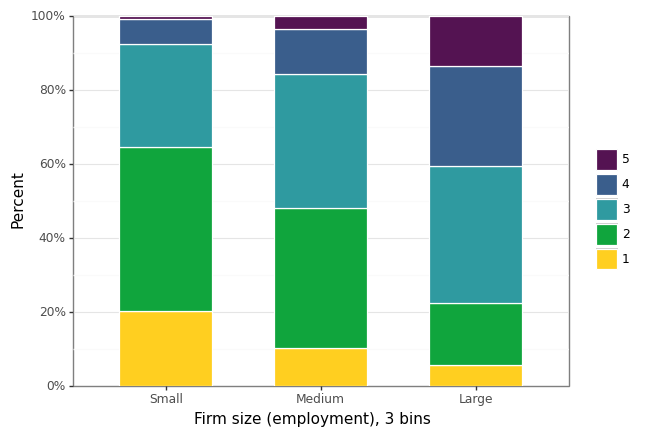

<ggplot: (83532351957)>

In [21]:
ggplot(df1, aes(x="emp3bins", y="Percent", fill="lean1")) + geom_bar(
    stat="identity", position="fill", width=0.6, color="white", size=0.5, alpha=0.8
) + scale_y_continuous( 
    expand=(0, 0), limits=(0, 1), breaks=seq(0, 1.1, by=0.2), labels=percent_format()
) + labs(
    x="Firm size (employment), 3 bins", y="Percent"
) + theme_bw() + theme(
    legend_position="right"
) + scale_fill_manual(
    values=(color[2], color[0], color[4], color[1], color[3]), name=" "
) + scale_x_discrete(limits=[1, 2, 3],
                     labels=["Small", "Medium", "Large"])

In [24]:
df1

,emp3bins,lean1,Count,Percent
0,1.0,1.0,27,0.20301
1,1.0,2.0,59,0.44361
2,1.0,3.0,37,0.27820
3,1.0,4.0,9,0.06767
4,1.0,5.0,1,0.00752
5,2.0,1.0,29,0.10211
6,2.0,2.0,108,0.38028
7,2.0,3.0,103,0.36268
8,2.0,4.0,34,0.11972
9,2.0,5.0,10,0.03521


What can we observe from this chart? Well, overall, there is a positive correlation between lean management and firm size. As firm size gets bigger, we tend to see an increase in higher ratings and a decrease in lower values. Brazil has returned lean management results similar to Mexico. The correlation is similar in both cases, with a few difference. For instance, small firms in Brazil received lower ratings than in Mexico, with more than 60% of values equal or lower than 2 - in Mexico, this range registered a percentage of around 58%. Medium-sized firms, likewise, showed a large proportion of a score of 3 points, while Mexican firms with such firm size presented a higher proportion of 4 to 5 points. Brazilian large firms, however, were graded in a different way when compared to its Mexican counterparts. The proportion of firms rated with 1 to 2 points was around 21%, while in Mexico this range was around 32%. There was also a significant difference in 3 and 5 points ratings: Brazilian firms registered 37% of firms rated with 3 points, compared to 30% in Mexico, and 13% with 5 points, compared to 8% in Mexico. Considering that both countries registered similar proportions for 4 points, hence, we can affirm that Brazilian large-sized firms scored higher points than Mexican firms with similar sizes.

Let's plot the second stacked chart.
<h4>4.1.2 Stacked bar chart | Figure 4.3 (b) Performance tracking</h4>


In [22]:
df2 = pd.DataFrame(
    df.loc[:, ["emp3bins", "perf2"]].groupby(["emp3bins", "perf2"]).agg("size")
).reset_index()

df2.columns = ["emp3bins", "perf2", "Count"]

group_counts = df2.groupby("emp3bins").agg("sum")["Count"]

df2.loc[df2["emp3bins"] == 1, "Percent"] = round(df2.loc[df2["emp3bins"] == 1, "Count"]/group_counts[1],5)
df2.loc[df2["emp3bins"] == 2, "Percent"] = round(df2.loc[df2["emp3bins"] == 2, "Count"]/group_counts[2],5)
df2.loc[df2["emp3bins"] == 3, "Percent"] = round(df2.loc[df2["emp3bins"] == 3, "Count"]/group_counts[3],5)

df2 = df2.assign(
    perf2=pd.Categorical(
        df2["perf2"], categories=sorted(set(df["perf2"]), reverse=True)
    )
)

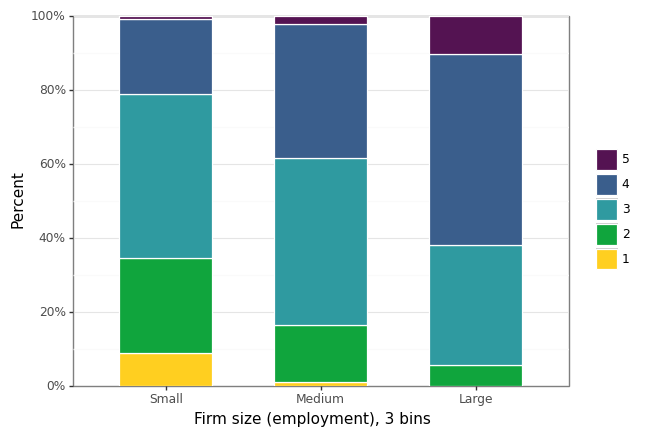

<ggplot: (83532392409)>

In [23]:
ggplot(df2, aes(x="emp3bins", y="Percent", fill="perf2")) + geom_bar(
    stat="identity", position="fill", width=0.6, color="white", size=0.5, alpha=0.8
) + scale_y_continuous( 
    expand=(0, 0), limits=(0, 1), breaks=seq(0, 1.1, by=0.2), labels=percent_format()
) + labs(
    x="Firm size (employment), 3 bins", y="Percent"
) + theme_bw() + theme(
    legend_position="right"
) + scale_fill_manual(
    values=(color[2], color[0], color[4], color[1], color[3]), name=" "
) + scale_x_discrete(limits=[1, 2, 3],
                     labels=["Small", "Medium", "Large"])

In [25]:
df2

,emp3bins,perf2,Count,Percent
0,1.0,1.0,12,0.09023
1,1.0,2.0,34,0.25564
2,1.0,3.0,59,0.44361
3,1.0,4.0,27,0.20301
4,1.0,5.0,1,0.00752
5,2.0,1.0,3,0.01056
6,2.0,2.0,44,0.15493
7,2.0,3.0,128,0.45070
8,2.0,4.0,103,0.36268
9,2.0,5.0,6,0.02113


Here again, the figures show a similar pattern association between the quality of management and firm size. Small firms in Brazil tend to have lower scores and a lower probability of displaying high scores than medium-sized firms, which are more likely to have low scores and less likely to have higher scores than large firms. 

Now, when comparing Brazilian and Mexican firms, we notice than small-sized firms from Brazil performed worse than similar Mexican companies. The former registered a higher number of poorly-rated scores - almost 35% of all observations for small firms were equal to or below 2. In Mexico, this range did not exceed 22%. Only around 21% of small-sized Brazilain firms registered 4 to 5 points in performance tracking, while more than 40% of Mexican firms of a similar size got 4 or more points. This difference is evident in other firm size categories. Large Mexican firms, for instance, registered a higher proportion of 4 to 5 points than Brazilian firms. Overall, however, the correlation seems clear - the larger the company, the better managed it seems to be.

<h3>4.2 Ploting bin scatters</h3>
<h4>4.2.1 Three bins</h4>
<p>We can now discuss conditional mean and joint distribution. Remember that <b>joint distribution</b> of two variables is the frequency of each value combination of the two variables. First, let's use the three bins that we had created. We can group them by the 3 bins and the firm sizes. We can get aggregate measures of min, max, average, median, standard deviation, and frequency of each bin category. Then, we will replace the bin numbers by a point corresponding to the midpoint in the employment bin (for instance, 150 for the 100-199 bin, 600 for the 200-999 bin, and so on).</p>

In [26]:
df.filter(["emp_firm", "emp3bins"]).groupby("emp3bins").agg(
    ["min", "max", "mean", "median", np.std, "size"]
)

emp_firm                                               
              min     max         mean  median          std size
emp3bins                                                        
1.0         100.0   195.0   140.157895   140.0    26.936188  133
2.0         200.0   984.0   431.144366   355.0   208.969431  284
3.0        1000.0  5000.0  2295.393258  2000.0  1268.342741   89

In [27]:
# Recode employee bins 
df["emp3bins"] = df["emp3bins"].replace(1, 150).replace(2, 600).replace(3, 3000)
df["emp3bins"]

1760     600.0
1763     600.0
1765     600.0
1766    3000.0
1770     150.0
         ...  
2898     150.0
2899    3000.0
2904     150.0
2905     600.0
2907    3000.0
Name: emp3bins, Length: 506, dtype: float64

In [28]:
# Summary statistics
df.filter(["emp_firm", "emp3bins"]).groupby("emp3bins").agg(
    ["min", "max", "mean", "median", np.std, "size"]
)

emp_firm                                               
              min     max         mean  median          std size
emp3bins                                                        
150.0       100.0   195.0   140.157895   140.0    26.936188  133
600.0       200.0   984.0   431.144366   355.0   208.969431  284
3000.0     1000.0  5000.0  2295.393258  2000.0  1268.342741   89

<p>We can now get the mean management scores for each bin by aggregating the data using the 3 bins and visualize the result.</p>

In [29]:
# Generate variables by mean
df1 = df.groupby("emp3bins").agg(management_emp3bins=("management", "mean")).reset_index()
df1

,emp3bins,management_emp3bins
0,150.0,2.412281
1,600.0,2.755086
2,3000.0,3.152310


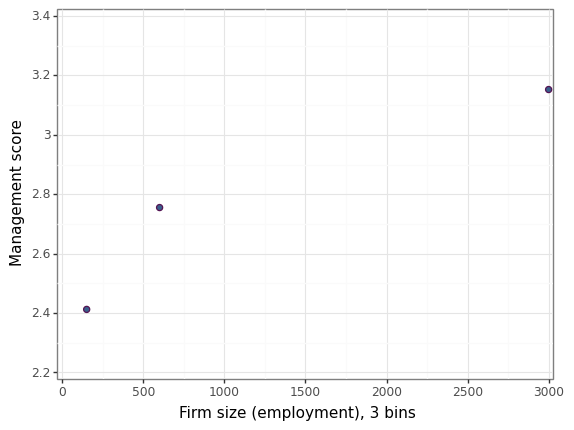

<ggplot: (83532539499)>

In [32]:
ggplot(df1, aes(x="emp3bins", y="management_emp3bins")) + geom_point(
    size=2, color=color[2], fill=color[0], alpha=0.8, na_rm=True
) + scale_y_continuous(
    expand=(0.01, 0.01), limits=(2.2, 3.4), breaks=seq(2.2, 3.5, by=0.2)
) + scale_x_continuous(
    expand=(0.01, 0.01), limits=(0, 3000), breaks=seq(0, 3001, by=500)
) + labs(
    x="Firm size (employment), 3 bins", y="Management score"
) + theme_bw()

<p>As we can observe, there is a clear <b>positive</b> association. Larger firms, on average, are better managed. We got a mean score of 2.41 for small firms, 2.75 for medium-sized firms, and 3.14 for large firms. As expected, these mean values are lower than in Mexican firms for all three bins (2.67, 2.94, and 3.18, respectively). Yet, the overall correlation is very similar.</p>

<p>Now, would this association hold when using a bin scatter of 10 bins? Let's find out.</p>
<h4>4.2.2 Ten-bin scatter</h4>

In [33]:
df["emp10bins"] = pd.qcut(df["emp_firm"],10)

<p>We just applied an interesting function, <code>qcut()</code>, that discretizes variables into equal-sized buckets. I had no idea that such a function existed, so helpful!</p>

In [34]:
# Summary
df_summary = df.filter(["emp_firm", "emp10bins"]).groupby("emp10bins").agg(
    ["min", "max", "mean", "median", np.std, "size"]
)
df_summary

emp_firm                                               
                      min     max         mean  median          std size
emp10bins                                                               
(99.999, 130.0]     100.0   130.0   112.814815   110.0    11.201540   54
(130.0, 163.0]      132.0   163.0   147.270833   150.0     8.327702   48
(163.0, 200.0]      165.0   200.0   186.666667   185.0    12.754577   54
(200.0, 260.0]      202.0   260.0   235.301887   230.0    18.969191   53
(260.0, 343.5]      262.0   343.0   302.545455   300.0    20.824242   44
(343.5, 420.0]      344.0   420.0   376.411765   370.0    26.832947   51
(420.0, 600.0]      423.0   600.0   510.728814   500.0    62.025810   59
(600.0, 880.0]      615.0   880.0   749.952381   750.0    70.299690   42
(880.0, 1675.0]     890.0  1650.0  1139.080000  1085.0   213.216077   50
(1675.0, 5000.0]   1700.0  5000.0  3109.215686  3000.0  1103.544912   51

<p>We can now get the midpoint of each bin by replacing the interval with the mean of each interval.</p>

In [35]:
# Recode
df = df.replace({"emp10bins": df_summary["emp_firm"]["mean"].to_dict()})

In [36]:
df.filter(["emp_firm", "emp10bins"]).groupby("emp10bins").agg(
    ["min", "max", "mean", "median", np.std, "size"]
)

emp_firm                                               
                        min     max         mean  median          std size
emp10bins                                                                 
112.81481481481481    100.0   130.0   112.814815   110.0    11.201540   54
147.27083333333334    132.0   163.0   147.270833   150.0     8.327702   48
186.66666666666666    165.0   200.0   186.666667   185.0    12.754577   54
235.30188679245282    202.0   260.0   235.301887   230.0    18.969191   53
302.54545454545456    262.0   343.0   302.545455   300.0    20.824242   44
376.4117647058824     344.0   420.0   376.411765   370.0    26.832947   51
510.728813559322      423.0   600.0   510.728814   500.0    62.025810   59
749.952380952381      615.0   880.0   749.952381   750.0    70.299690   42
1139.08               890.0  1650.0  1139.080000  1085.0   213.216077   50
3109.2156862745096   1700.0  5000.0  3109.215686  3000.0  1103.544912   51

In [37]:
# Return variables by mean
df1 = df.groupby("emp10bins").agg(management_emp10bins=("management", "mean")).reset_index()
df1

,emp10bins,management_emp10bins
0,112.814815,2.365226
1,147.270833,2.393519
2,186.666667,2.575103
3,235.301887,2.631027
4,302.545455,2.584596
5,376.411765,2.732026
6,510.728814,2.905838
7,749.952381,2.837302
8,1139.080000,3.073333
9,3109.215686,3.242919


In [38]:
df1 = df1[["emp10bins", "management_emp10bins"]].astype("float64")

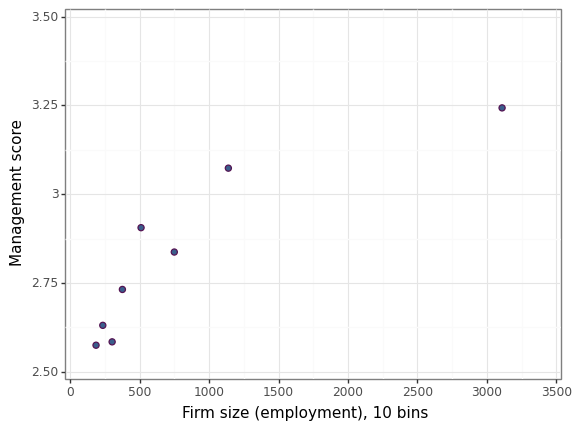

<ggplot: (83532765082)>

In [39]:
ggplot(df1, aes(x="emp10bins", y="management_emp10bins")) + geom_point(
    size=2, color=color[2], fill=color[0], alpha=0.8, na_rm=True
) + scale_y_continuous(
    expand=(0.01, 0.01), limits=(2.5, 3.5), breaks=seq(2.5, 3.6, by=0.25)
) + scale_x_continuous(
    expand=(0.01, 0.01), limits=(0, 3500), breaks=seq(0, 3501, by=500)
) + labs(
    x="Firm size (employment), 10 bins", y="Management score"
) + theme_bw()